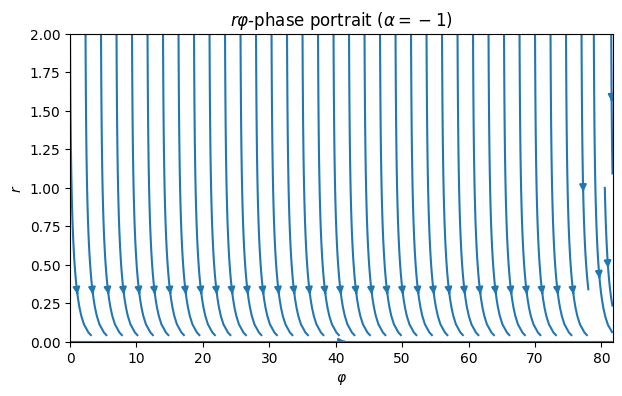

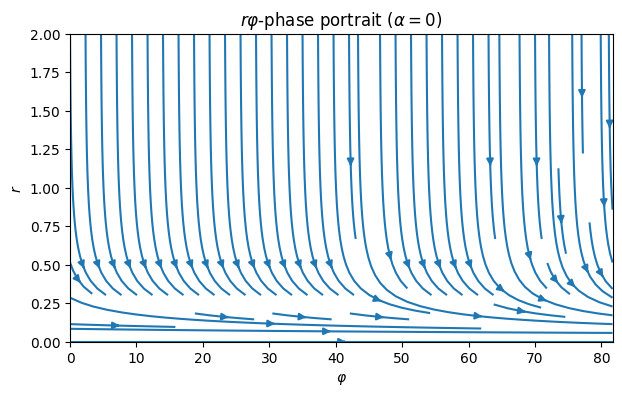

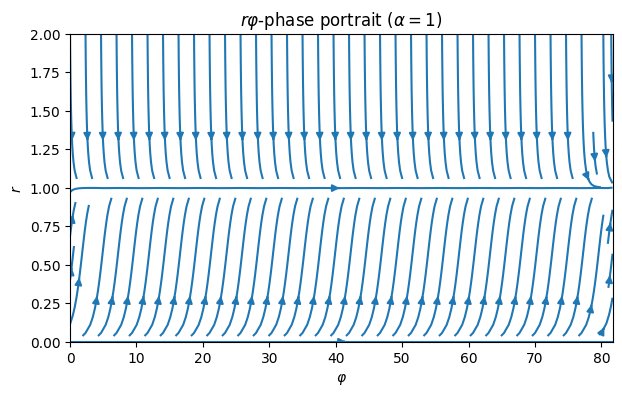

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

alpha_vals = [-1, 0, 1] 

phi = np.linspace(0, 26*np.pi, 300)
r = np.linspace(0, 2, 300)
PHI, R = np.meshgrid(phi, r)

for alpha in alpha_vals:
    dphi = np.ones_like(R)
    dr = alpha*R - R**3

    plt.figure(figsize=(7,4))
    plt.streamplot(PHI, R, dphi, dr, density=1.2)
    plt.xlabel(r"$\varphi$")
    plt.ylabel(r"$r$")
    plt.title(fr"$r\varphi$-phase portrait ($\alpha={alpha}$)")
    plt.ylim(0, 2)
    plt.show()


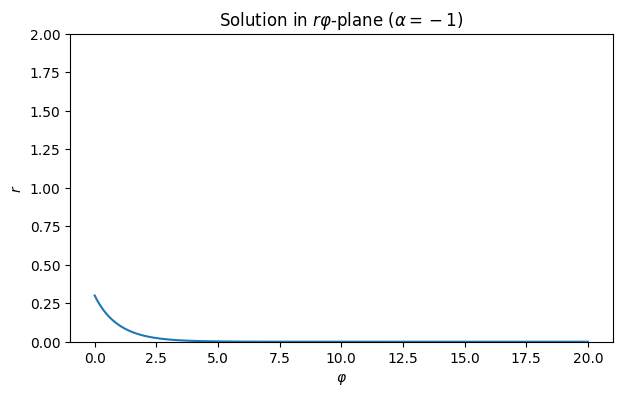

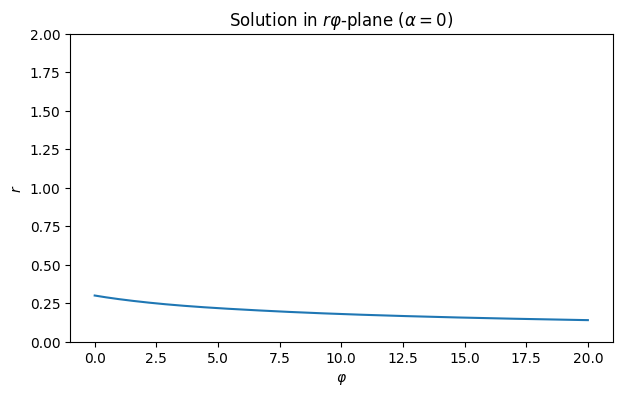

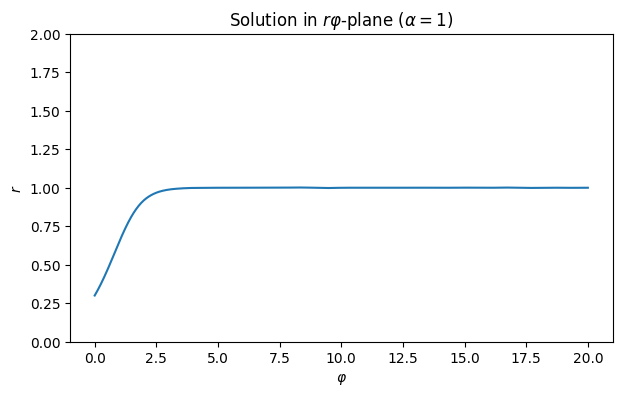

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

alpha_vals = [-1, 0, 1]

def system(phi, Y):
    r, theta = Y
    dr_dphi = alpha * r - r**3
    dtheta_dphi = 1
    return [dr_dphi, dtheta_dphi]

Y0 = [0.3, 0.0]

phi_span = (0, 20)
phi_eval = np.linspace(0, 20, 1000)

for alpha in alpha_vals:
    sol = solve_ivp(system, phi_span, Y0, t_eval=phi_eval)

    plt.figure(figsize=(7,4))
    plt.plot(sol.t, sol.y[0])
    plt.xlabel(r"$\varphi$")
    plt.ylabel(r"$r$")
    plt.title(fr"Solution in $r\varphi$-plane ($\alpha={alpha}$)")
    plt.ylim(0, 2)
    plt.show()


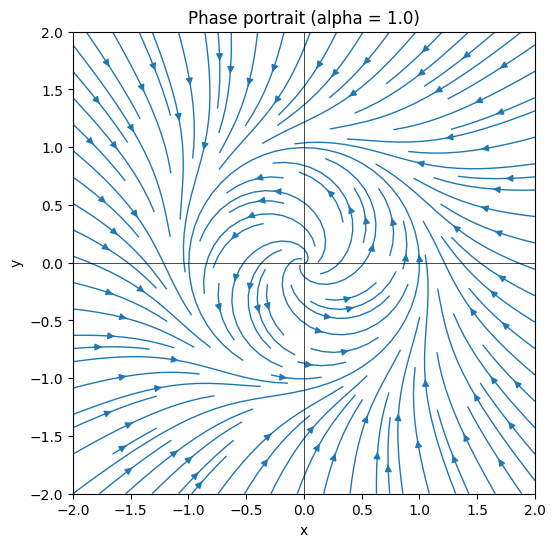

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sys(x,y,alpha):
    dx = alpha*x - y - x*(x**2 + y**2)
    dy = x + alpha*y - y*(x**2 + y**2)
    return dx, dy


alpha = 1.0

x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

U, V = sys(X, Y, alpha)

plt.figure(figsize=(6,6))
plt.streamplot(X, Y, U, V, density=1.2, linewidth=1)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Phase portrait (alpha = {alpha})")
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.gca().set_aspect('equal')
plt.show()


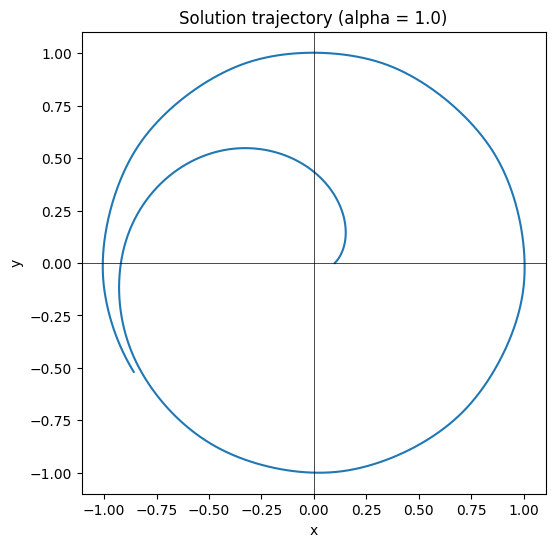

In [10]:
#now solve sys using solve_ivp

T = 10
N = 1000
t = np.linspace(0, T, N)

y0 = [0.1, 0.0]

sol = solve_ivp(lambda t, Y: sys(Y[0], Y[1], alpha), [0, T], y0, t_eval=t)

#plot
plt.figure(figsize=(6,6))
plt.plot(sol.y[0], sol.y[1])
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Solution trajectory (alpha = {alpha})")
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.gca().set_aspect('equal')
plt.show()
